# Insurance_Claim_Fraud_Detection

Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# EDA:

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [360]:
df.shape

(1000, 40)

In [361]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There is no null values except '_c39' column, which has all null values. So we can drop that column

In [362]:
df['_c39'].unique()

array([nan])

In [5]:
df.drop(['_c39'],axis=1,inplace=True)

In [364]:
collist = df.columns.values

for i in collist:
    print(f"unique value of {i} is {df[i].value_counts()}\n")

unique value of months_as_customer is 194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

unique value of age is 43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

unique value of policy_number is 521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

unique value of policy_bind_date is 01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03

1. police_report_available ,property_damage ,collision_type has '?' so we need to replace this value.

2. we can drop umbrella_limit column as it has 80% zeros. so, we can drop this column.

3. policy_csl can be splited into two for better analysis.

In [6]:
df['csl_per_person'] = df.policy_csl.str.split('/',expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/',expand=True)[1]

Now i will convert this to int

In [7]:
df['csl_per_person'] = df['csl_per_person'].astype('int64')
df['csl_per_accident'] = df['csl_per_accident'].astype('int64')

dropping policy_csl column after extraction

In [8]:
df = df.drop(['policy_csl'],axis=1) 

In [9]:
# extracting auto_age from auto_year

df['auto_age'] = 2018 - df['auto_year']

In [10]:
#dropping auto_year

df = df.drop(['auto_year'],axis=1)

Again we need to extract date,month and year from 'policy_bind_date' and 'incident_date'

In [11]:
df = df.drop(['umbrella_limit'],axis=1)

In [12]:
#convert object to datetime format

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [13]:
# year
df["policy_bind_year"]=pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.year

# month
df["policy_bind_month"]=pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.month

# day
df["policy_bind_day"]=pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.day

In [14]:
df = df.drop(['policy_bind_date'],axis=1)

In [15]:
#year
df['incident_year'] = pd.to_datetime(df.incident_date,format="%d%m%Y").dt.year
#month
df['incident_month'] = pd.to_datetime(df.incident_date,format="%d%m%Y").dt.month
#day
df['incident_day'] = pd.to_datetime(df.incident_date,format="%d%m%Y").dt.day

In [16]:
df = df.drop(['incident_date'],axis=1)

In [17]:
df.shape

(1000, 43)

In [18]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [19]:
df['police_report_available'] = df['police_report_available'].replace('?','NO')

In [20]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [21]:
df['property_damage'] = df['property_damage'].replace('?','NO')

In [22]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [23]:
df['collision_type'] = df['collision_type'].replace('?','Side Collision')

In [24]:
df.shape

(1000, 43)

In [384]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_deductable                 3
policy_annual_premium           991
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                         4
police_report_available           2
total_claim_amount          

'policy_number', 'incident_location' has 1000 unique values so we can drop that columns

In [25]:
df = df.drop(['policy_number', 'incident_location'],axis=1)

In [26]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,fraud_reported,csl_per_person,csl_per_accident,auto_age,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
0,328,48,OH,1000,1406.91,466132,MALE,MD,craft-repair,sleeping,...,Y,250,500,14,2014,10,17,2015,1,25
1,228,42,IN,2000,1197.22,468176,MALE,MD,machine-op-inspct,reading,...,Y,250,500,11,2006,6,27,2015,1,21
2,134,29,OH,2000,1413.14,430632,FEMALE,PhD,sales,board-games,...,N,100,300,11,2000,6,9,2015,2,22
3,256,41,IL,2000,1415.74,608117,FEMALE,PhD,armed-forces,board-games,...,Y,250,500,4,1990,5,25,2015,10,1
4,228,44,IL,1000,1583.91,610706,MALE,Associate,sales,board-games,...,N,500,1000,9,2014,6,6,2015,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,431289,FEMALE,Masters,craft-repair,paintball,...,N,500,1000,12,1991,7,16,2015,2,22
996,285,41,IL,1000,1436.79,608177,FEMALE,PhD,prof-specialty,sleeping,...,N,100,300,3,2014,5,1,2015,1,24
997,130,34,OH,500,1383.49,442797,FEMALE,Masters,armed-forces,bungie-jumping,...,N,250,500,22,2003,2,17,2015,1,23
998,458,62,IL,2000,1356.92,441714,MALE,Associate,handlers-cleaners,base-jumping,...,N,500,1000,20,2011,11,18,2015,2,26


lets check for categorical column

In [27]:
col = df.columns
num_col = df._get_numeric_data().columns
cat_col = list(set(col) - set(num_col))
cat_col

['policy_state',
 'auto_model',
 'property_damage',
 'fraud_reported',
 'police_report_available',
 'auto_make',
 'incident_severity',
 'insured_occupation',
 'insured_hobbies',
 'incident_type',
 'authorities_contacted',
 'insured_relationship',
 'insured_education_level',
 'insured_sex',
 'incident_city',
 'incident_state',
 'collision_type']

# convert categorical column into numeric using label encoder

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [29]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,fraud_reported,csl_per_person,csl_per_accident,auto_age,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
0,328,48,2,1000,1406.91,466132,1,4,2,17,...,1,250,500,14,2014,10,17,2015,1,25
1,228,42,1,2000,1197.22,468176,1,4,6,15,...,1,250,500,11,2006,6,27,2015,1,21
2,134,29,2,2000,1413.14,430632,0,6,11,2,...,0,100,300,11,2000,6,9,2015,2,22
3,256,41,0,2000,1415.74,608117,0,6,1,2,...,1,250,500,4,1990,5,25,2015,10,1
4,228,44,0,1000,1583.91,610706,1,0,11,2,...,0,500,1000,9,2014,6,6,2015,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,431289,0,5,2,13,...,0,500,1000,12,1991,7,16,2015,2,22
996,285,41,0,1000,1436.79,608177,0,6,9,17,...,0,100,300,3,2014,5,1,2015,1,24
997,130,34,2,500,1383.49,442797,0,5,1,3,...,0,250,500,22,2003,2,17,2015,1,23
998,458,62,0,2000,1356.92,441714,1,0,5,0,...,0,500,1000,20,2011,11,18,2015,2,26


In [30]:
df.describe()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,fraud_reported,csl_per_person,csl_per_accident,auto_age,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000
mean,203.954000,38.948000,1.01400,1136.000000,1256.406150,501214.488000,0.463000,2.966000,6.653000,9.731000,...,0.247000,272.650000,580.200000,12.897000,2001.604000,6.559000,15.448000,2015.0,3.407000,13.08400
std,115.113174,9.140287,0.83096,611.864673,244.167395,71701.610941,0.498879,1.948497,4.019048,5.674049,...,0.431483,161.603196,287.420547,6.015861,7.360391,3.391758,8.850176,0.0,3.276291,10.44318
min,0.000000,19.000000,0.00000,500.000000,433.330000,430104.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,100.000000,300.000000,3.000000,1990.000000,1.000000,1.000000,2015.0,1.000000,1.00000
25%,115.750000,32.000000,0.00000,500.000000,1089.607500,448404.500000,0.000000,1.000000,3.000000,5.000000,...,0.000000,100.000000,300.000000,8.000000,1995.000000,4.000000,8.000000,2015.0,1.000000,2.00000
50%,199.500000,38.000000,1.00000,1000.000000,1257.200000,466445.500000,0.000000,3.000000,7.000000,10.000000,...,0.000000,250.000000,500.000000,13.000000,2002.000000,7.000000,16.000000,2015.0,2.000000,15.00000
75%,276.250000,44.000000,2.00000,2000.000000,1415.695000,603251.000000,1.000000,5.000000,10.000000,15.000000,...,0.000000,500.000000,1000.000000,18.000000,2008.000000,9.000000,23.000000,2015.0,5.000000,22.00000
max,479.000000,64.000000,2.00000,2000.000000,2047.590000,620962.000000,1.000000,6.000000,13.000000,19.000000,...,1.000000,500.000000,1000.000000,23.000000,2015.000000,12.000000,31.000000,2015.0,12.000000,31.00000


Key Observation:

1. There is large difference between 75% and max in 'months_as_customer', 'age', 'policy_annual_premium','insured_zip'and some few columns which means outliers is present

2. There is difference between min ,25% ,50% ,75% ,max which means skewness is present in few columns

In [31]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,fraud_reported,csl_per_person,csl_per_accident,auto_age,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.017895,0.060925,-0.000833,0.009814,-0.093661,...,0.020544,-0.025953,-0.025009,0.000292,-0.048276,0.005750,0.051728,NaN,0.024659,-0.011092
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.025604,0.073337,0.000969,0.017220,-0.081315,...,0.012143,-0.015500,-0.015519,-0.001354,-0.037444,0.015501,0.053869,NaN,0.023404,-0.006131
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,...,0.029432,-0.003855,-0.007221,-0.002114,-0.007276,0.071450,0.002277,NaN,0.023643,0.014745
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.004545,-0.009733,0.015217,-0.046733,0.004061,...,0.014817,0.003742,0.003943,-0.026105,-0.049598,-0.050416,0.009164,NaN,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,0.032354,0.038853,-0.019715,0.035922,-0.018019,...,-0.014480,0.021251,0.019066,0.049226,0.001249,-0.035355,-0.025183,NaN,0.021559,0.014835
insured_zip,0.017895,0.025604,0.008777,0.004545,0.032354,1.000000,-0.036942,0.016079,-0.069077,0.002106,...,0.019368,0.005376,0.004255,0.032736,-0.001100,0.015864,-0.039867,NaN,0.005461,0.019095
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,-0.036942,1.000000,0.009002,-0.006160,-0.020317,...,0.030873,-0.021566,-0.028850,0.028247,-0.032891,-0.004033,0.040713,NaN,0.024227,-0.007280
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,0.016079,0.009002,1.000000,-0.020298,0.021807,...,0.008808,0.009442,0.009521,-0.043509,0.018952,-0.007118,0.012610,NaN,0.075083,-0.058104
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,-0.069077,-0.006160,-0.020298,1.000000,-0.011077,...,0.001564,0.015042,0.014324,0.006676,-0.027085,0.026140,-0.006432,NaN,0.019403,-0.022105
insured_hobbies,-0.093661,-0.081315,-0.038689,0.004061,-0.018019,0.002106,-0.020317,0.021807,-0.011077,1.000000,...,-0.046838,-0.011580,-0.015361,0.014495,-0.013986,-0.004922,0.028914,NaN,-0.000082,0.014893


'incident_year' can be dropped as there is same year

In [32]:
df['incident_year'].unique()

array([2015], dtype=int64)

In [33]:
df = df.drop(['incident_year'],axis=1)

<AxesSubplot:>

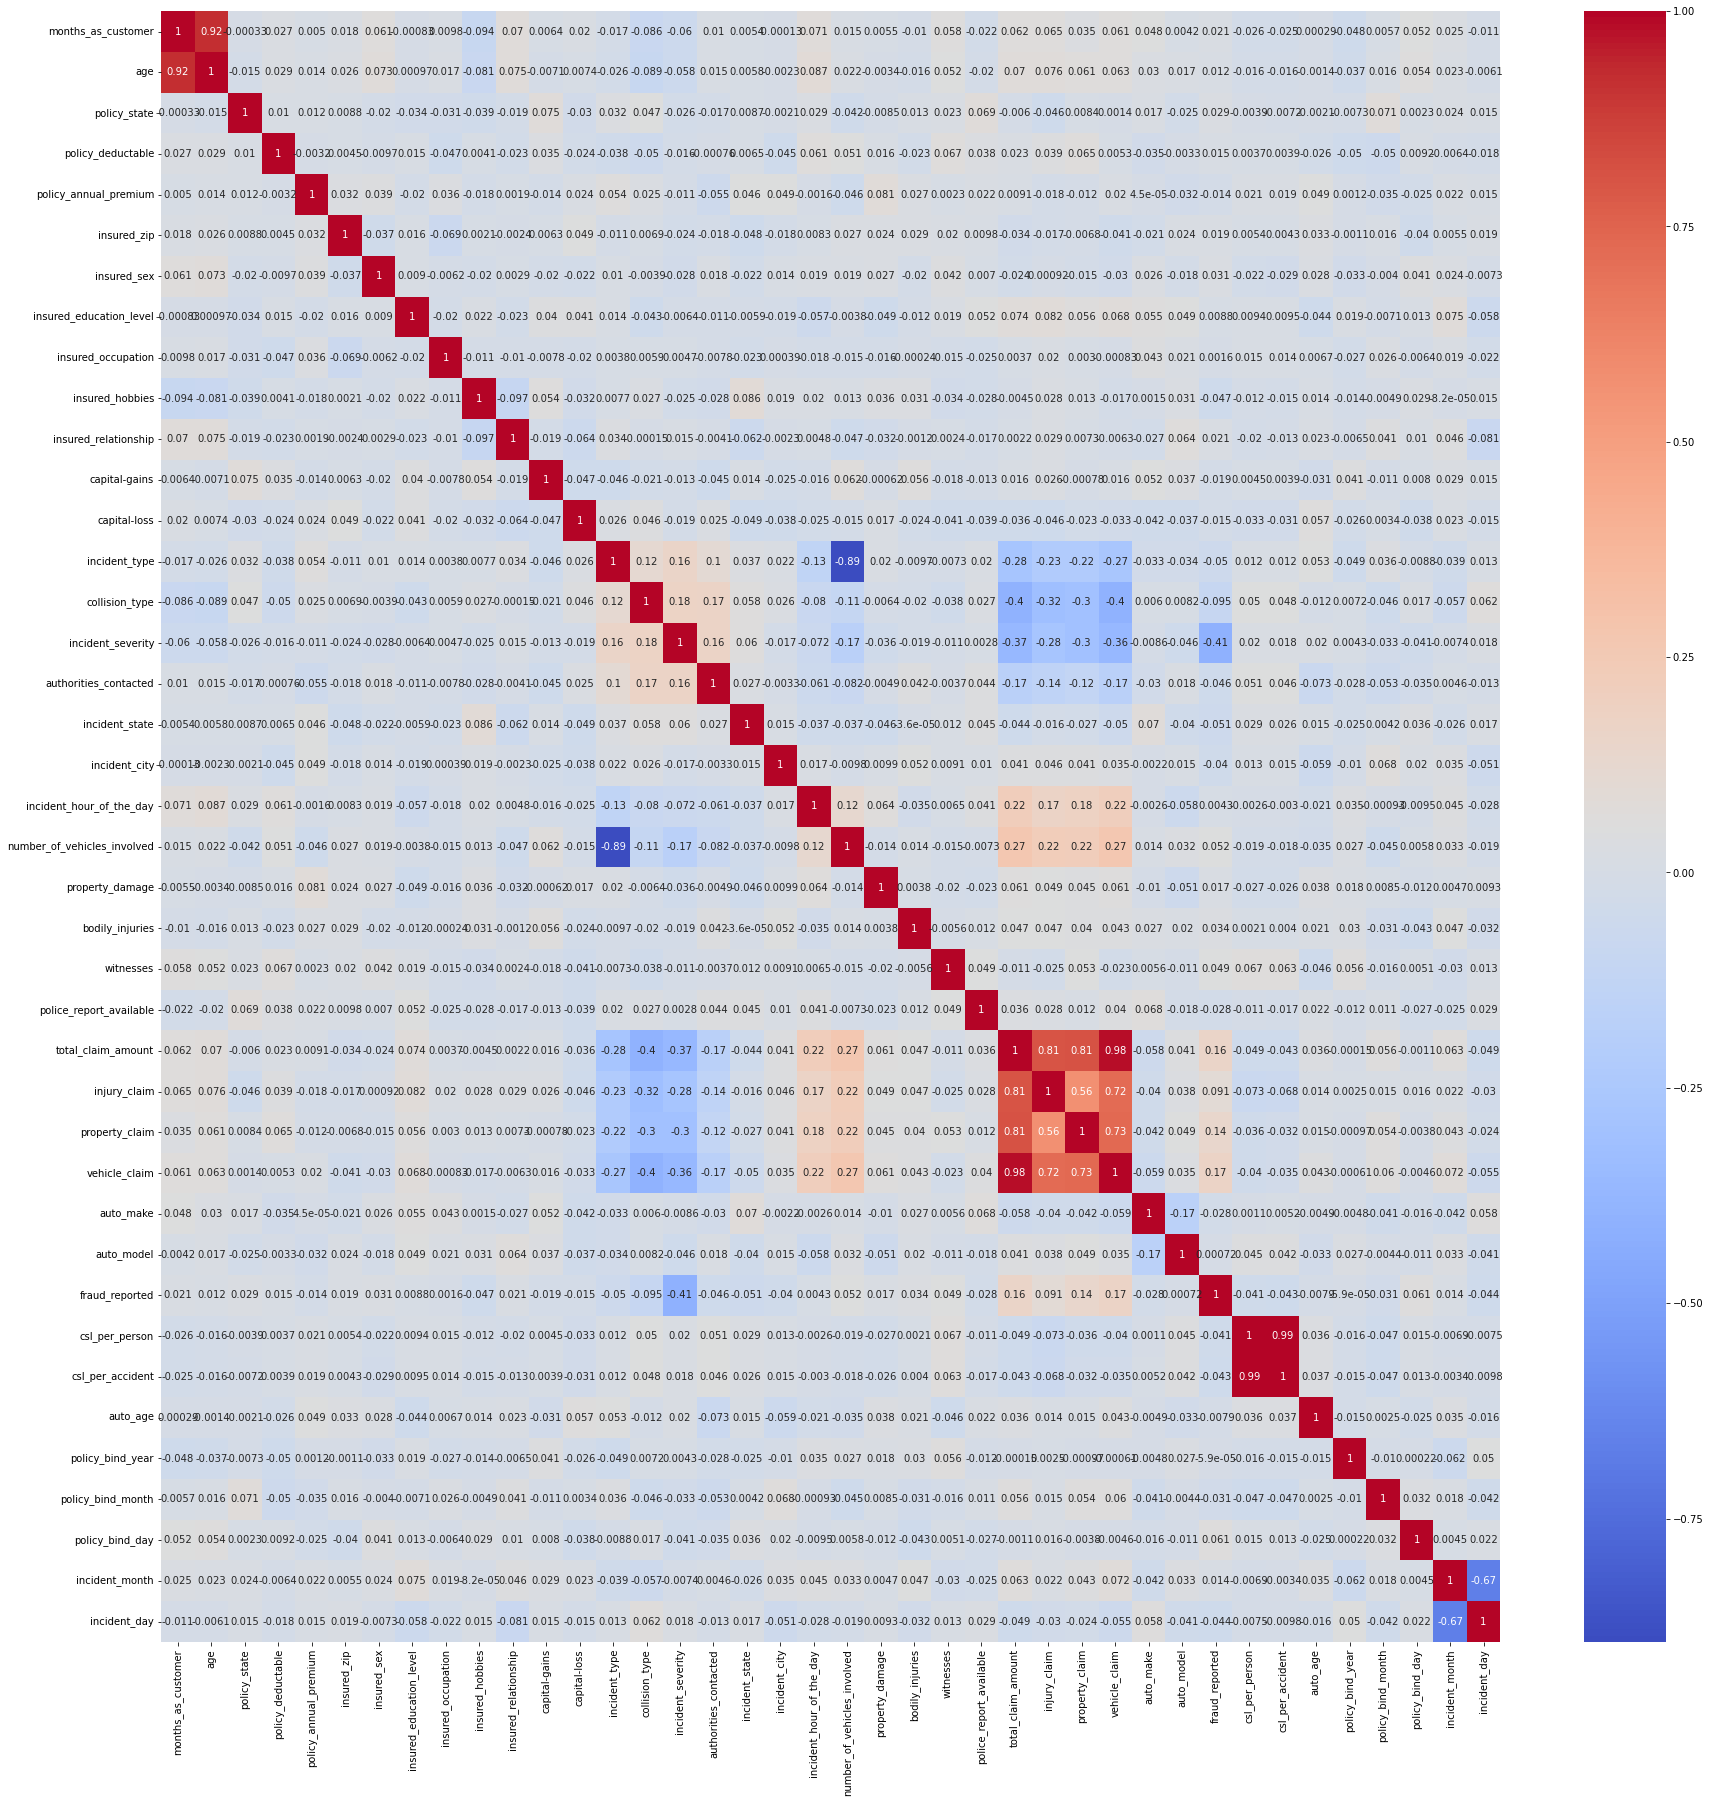

In [34]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

* incident_severity is least correlated with fraud_reported.
* 'total_claim_amount' , 'injury_claim', 'property_claim', ' vehicle_claim' is positively correlated with 'fraud_reported'

Text(0.5, 1.0, 'correlation with target variable')

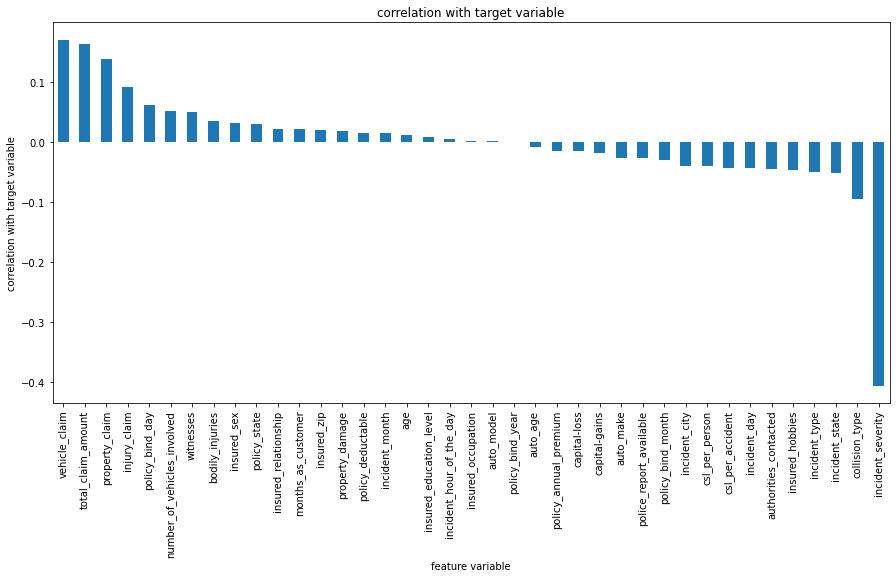

In [35]:
plt.figure(figsize=(15,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot.bar()
plt.xlabel("feature variable")
plt.ylabel("correlation with target variable")
plt.title("correlation with target variable")

Key Observations:

1. 'incident_severity','collision_type','incident_type','insured_hobbies', 'authorities_contacted','incident_day','csl_per_accident','incident_city','policy_bind_month','police_report_available', 'auto-make', 'capital-gains', 'capital-loss', 'policy_annual_premium' are negatively correlated with target variable.

2. 'vehicle_claim' , 'total_claim_amount', 'property_claim', 'injury_claim', 'policy_bind_day', 'number_of_vehicles_involved', 'witnesses', 'bodily_injuries', 'insured_sex', 'policy_state', 'insured_relationship', 'months_as_customer',' insured_zip', 'property_damage', 'policy_deductable','incident_month','age' are positively correlated with target column.

# finding skewness:

In [36]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.383017
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


keeping +/-0.5  as skew value we can find skewness is present in 'insured_zip', 'property_damage', 'police_report_available', 'csl_per_accident', 'incident_month' has skewness present.

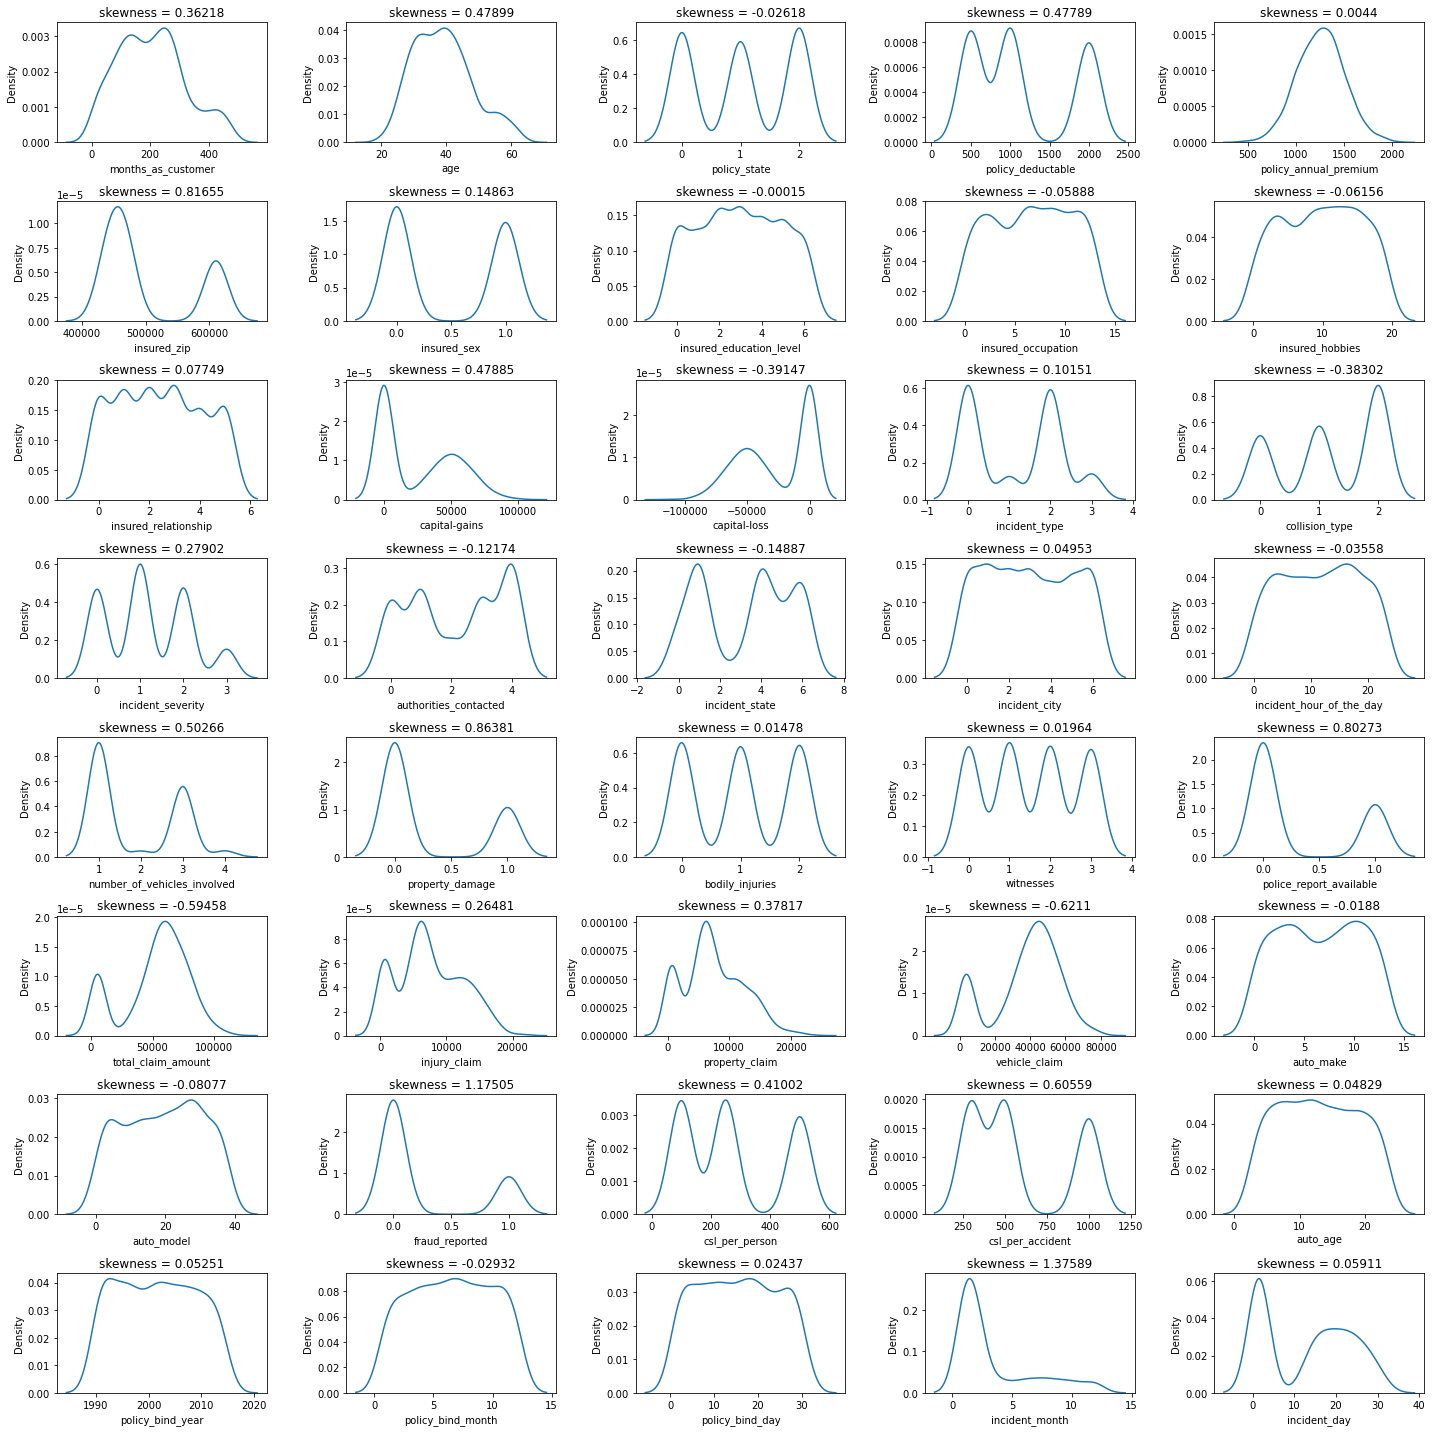

In [397]:
collist = df.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(8,5,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness = {round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

In [37]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

# removing skewness

removing skewness using power transform method

In [38]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [39]:
pd.DataFrame(x_new).skew().sort_values(ascending=True)

28   -0.522718
25   -0.510354
26   -0.415781
27   -0.358814
14   -0.305565
30   -0.278611
19   -0.256957
17   -0.255777
9    -0.247798
8    -0.239336
29   -0.227539
16   -0.227269
38   -0.221642
36   -0.213211
7    -0.188564
18   -0.181772
35   -0.171414
10   -0.160421
23   -0.153648
2    -0.145377
33   -0.137549
0    -0.135661
22   -0.128799
13   -0.088766
15   -0.079282
31   -0.034227
1    -0.001945
5     0.000000
4     0.004758
3     0.023988
34    0.034584
11    0.038722
12    0.090488
32    0.109377
6     0.148630
37    0.306468
20    0.363693
24    0.802728
21    0.863806
dtype: float64

In [40]:
x = pd.DataFrame((x_new),columns=x.columns)

Now skewness is removed by power transform method

# Detecting Outliers

months_as_customer                AxesSubplot(0.125,0.749828;0.0824468x0.130172)
age                            AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
policy_state                   AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
policy_deductable              AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
policy_annual_premium          AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
insured_zip                    AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
insured_sex                    AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
insured_education_level        AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
insured_occupation                AxesSubplot(0.125,0.593621;0.0824468x0.130172)
insured_hobbies                AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
insured_relationship           AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
capital-gains                  AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
capital-loss                

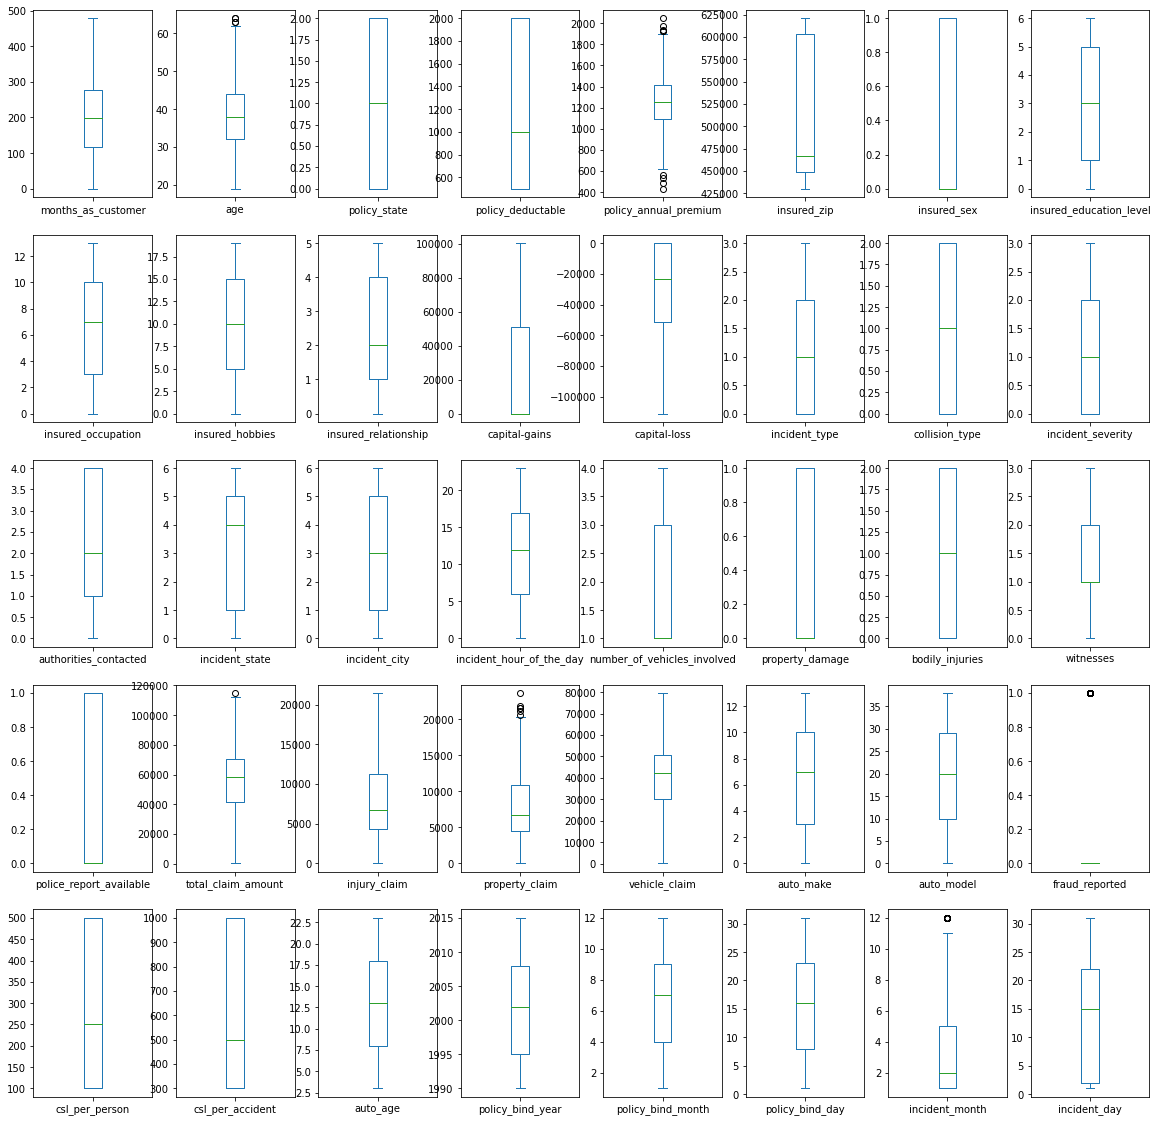

In [41]:
df.plot(kind='box',subplots='True',layout=(5,8),figsize=(20,20))

Key Observation:

Outliers are present in 'policy_annual_premium', 'property_claim', 'incident_month' have outliers present

# Removing Outliers

In [42]:
from scipy.stats import zscore

z = np.abs(zscore(x))
threshold = 3
x_new = x[(z<3).all(axis=1)]

In [43]:
print("Old DataFrame ",x.shape)
print("New DataFrame ",x_new.shape)
print("Dropped Rows ", x.shape[0]-x_new.shape[0])

Old DataFrame  (1000, 39)
New DataFrame  (0, 39)
Dropped Rows  1000


Here all rows are dropped so we need to do further analysis without removing outliers

In [44]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'fraud_reported', 'csl_per_person', 'csl_per_accident', 'auto_age',
       'policy_bind_year', 'policy_bind_month', 'policy_bind_day',
       'incident_month', 'incident_day'],
      dtype='object')

# Data Visualization:

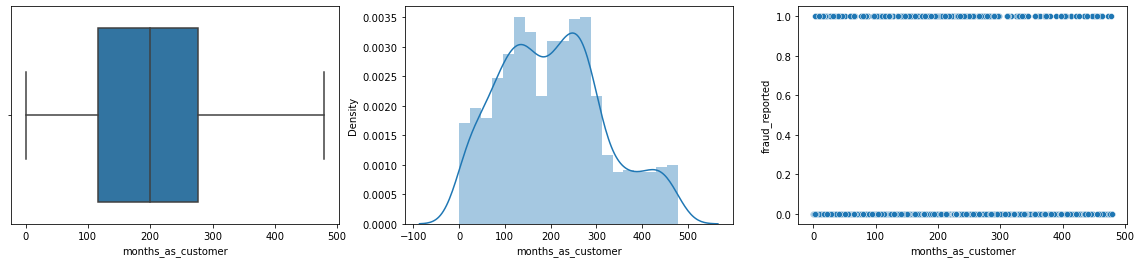

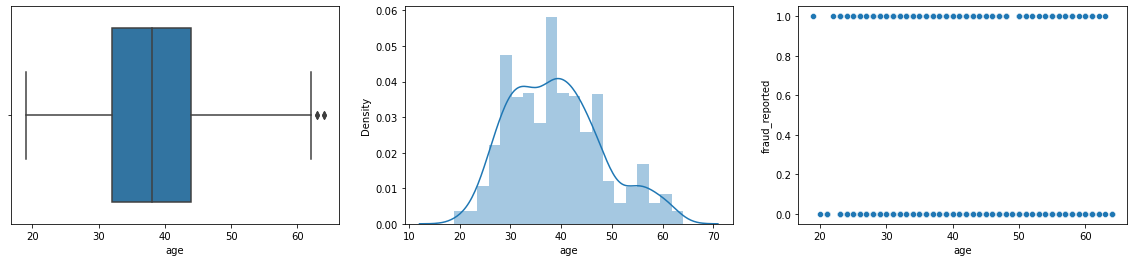

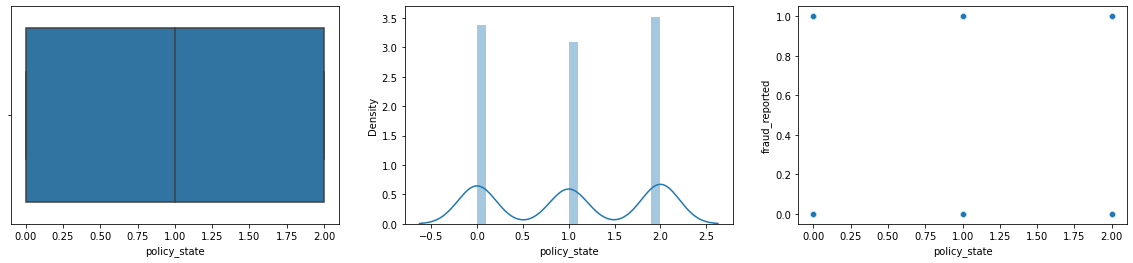

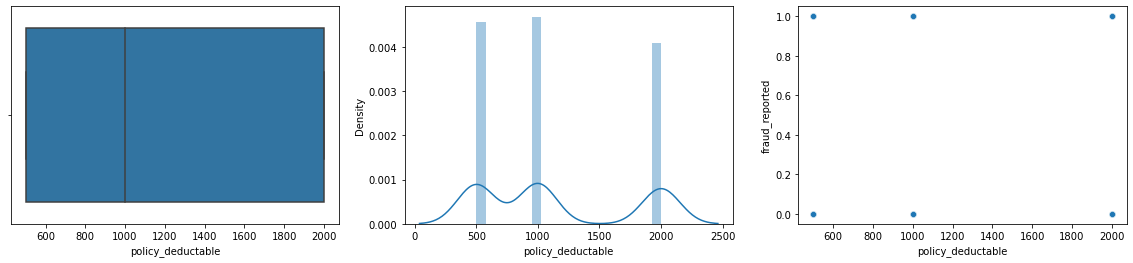

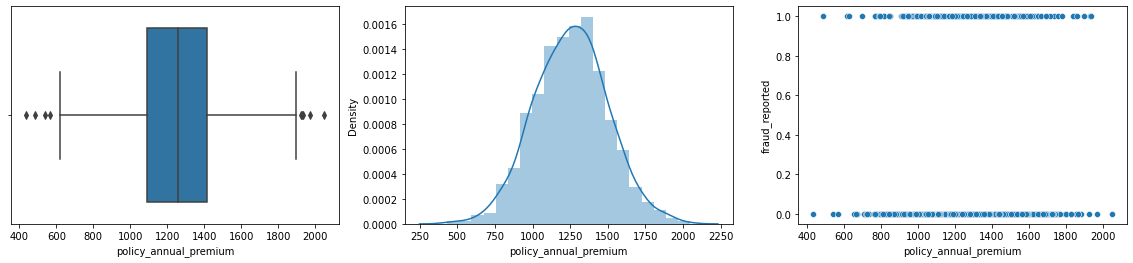

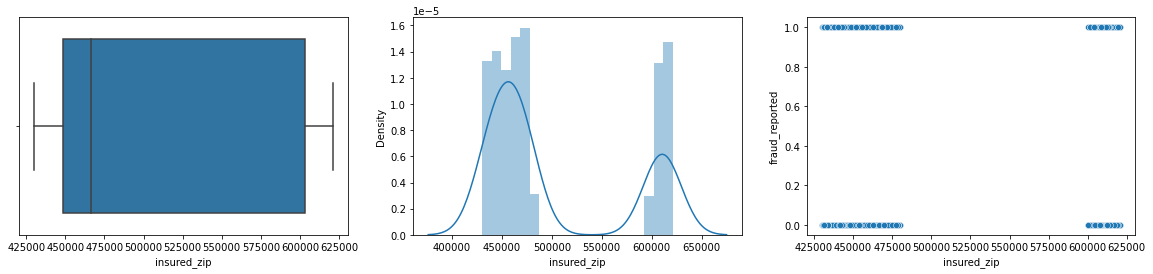

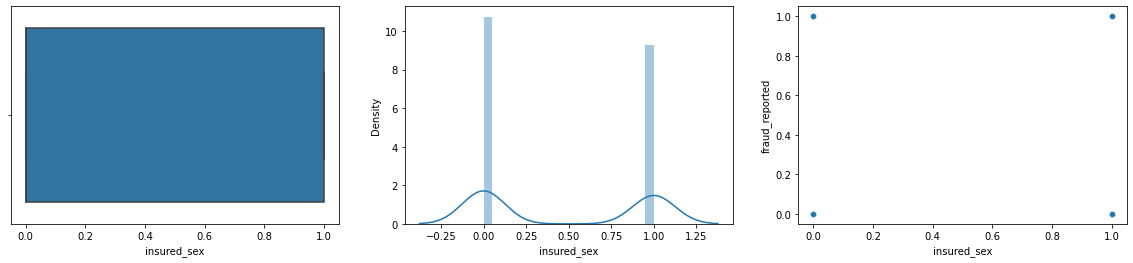

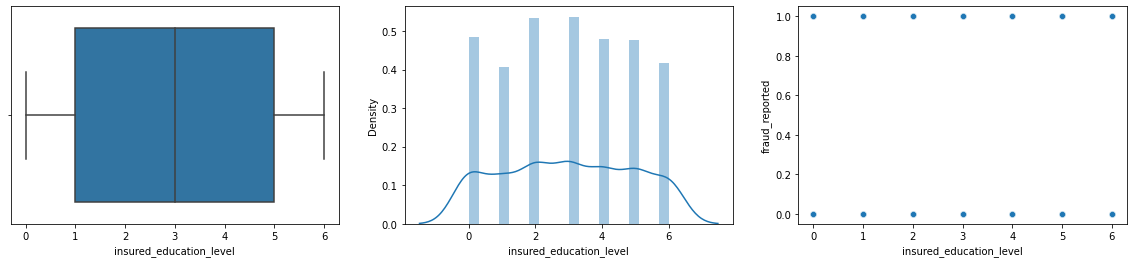

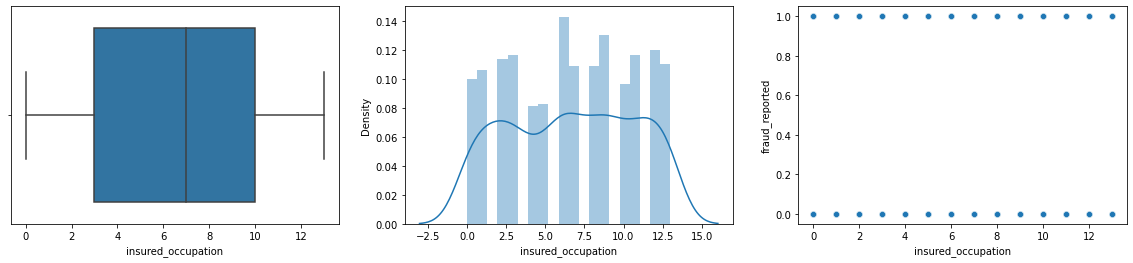

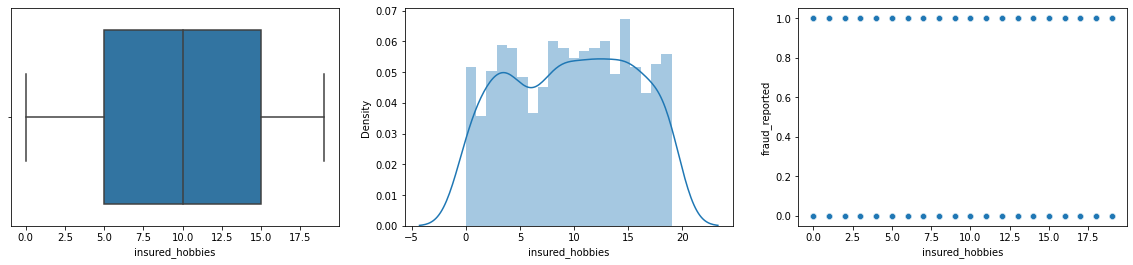

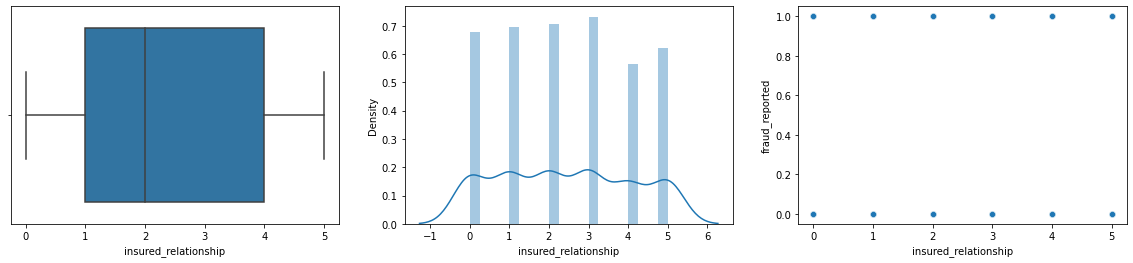

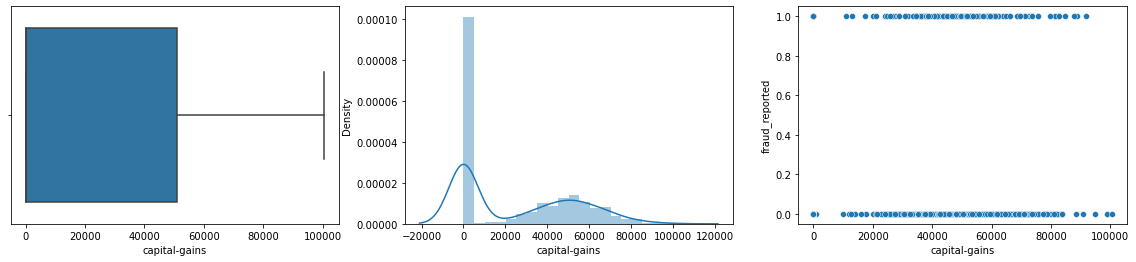

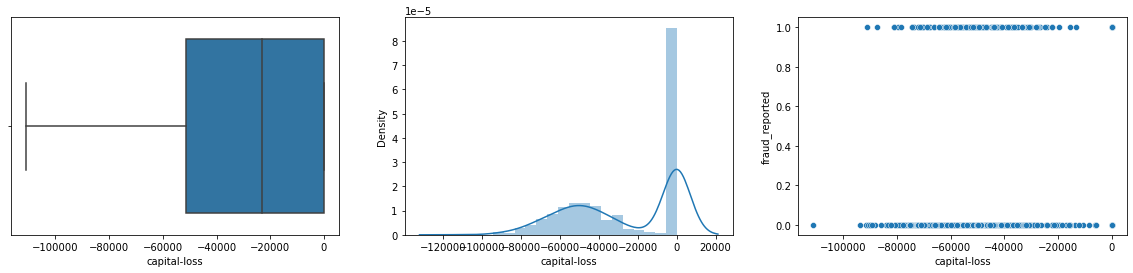

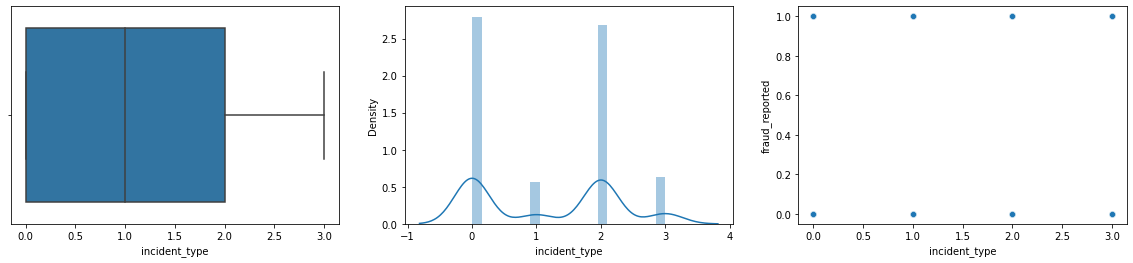

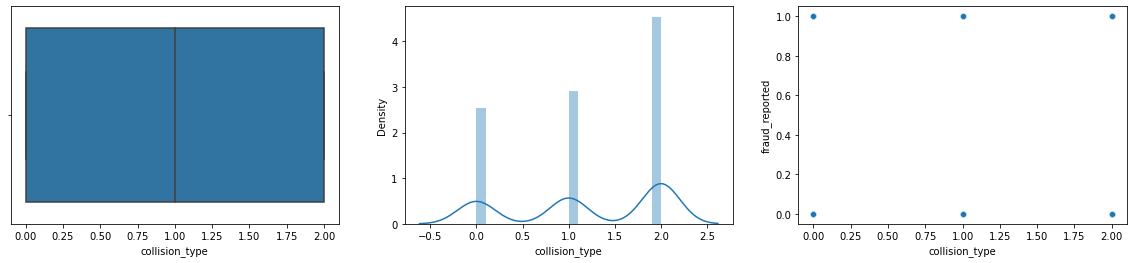

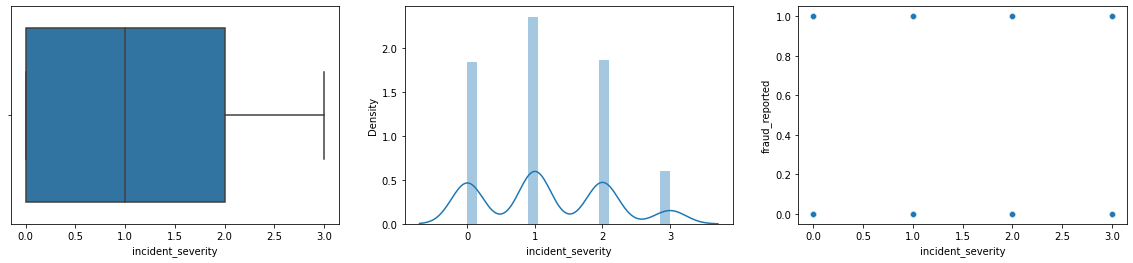

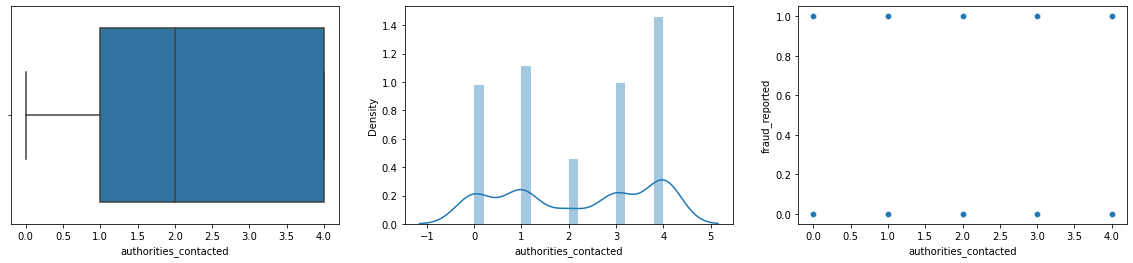

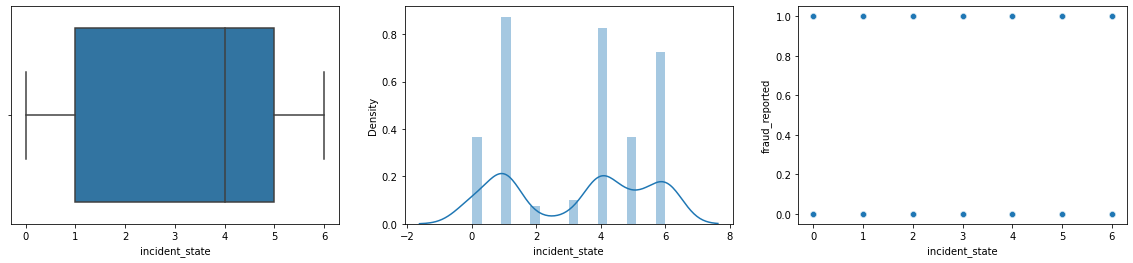

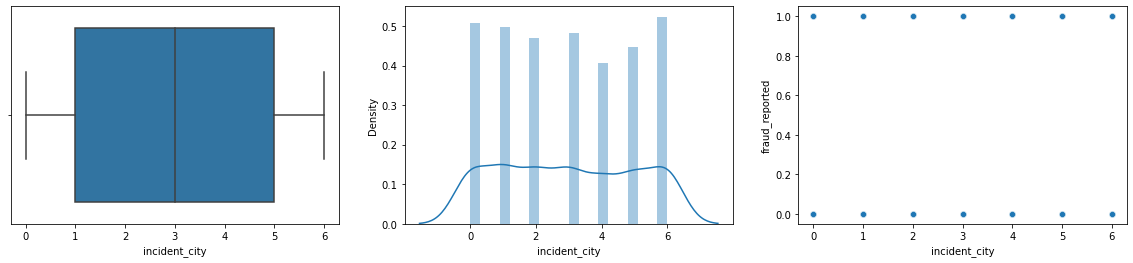

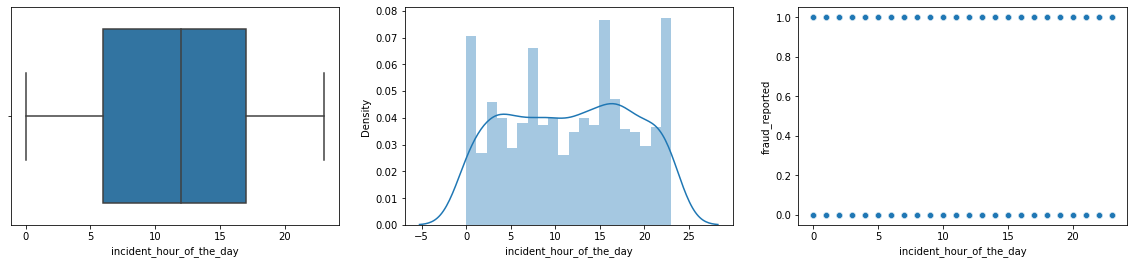

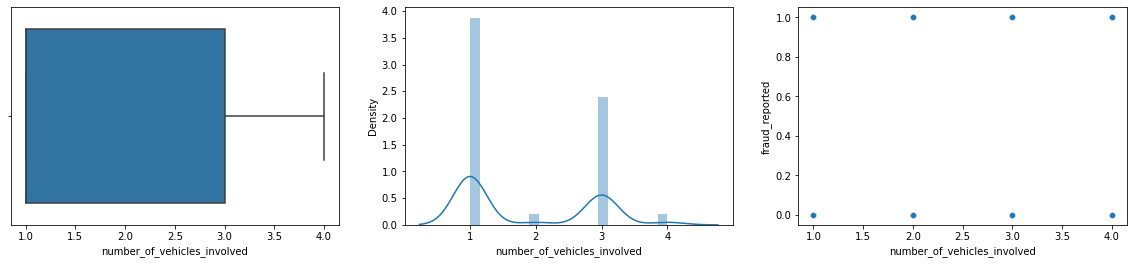

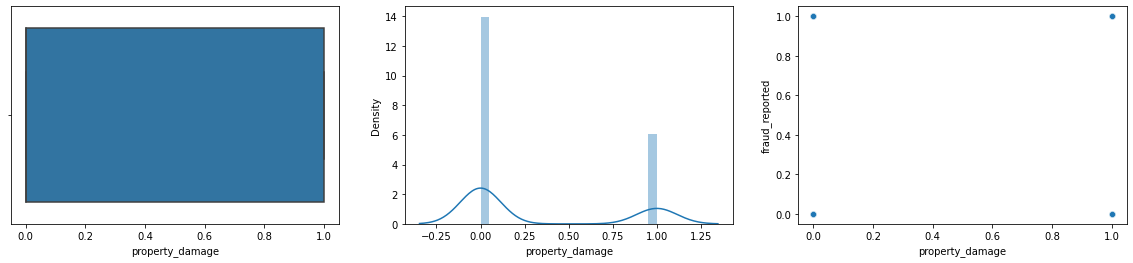

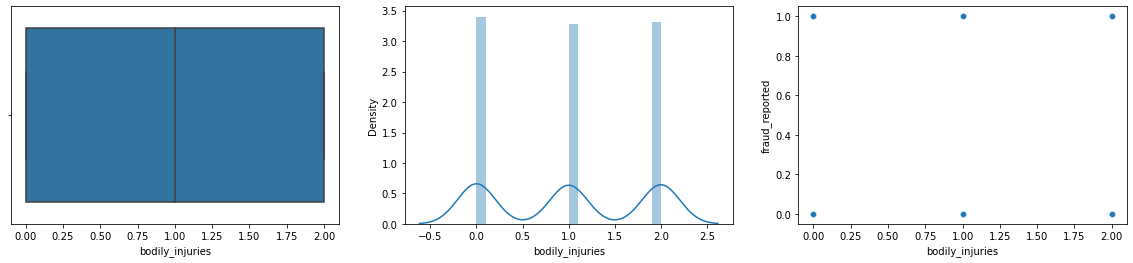

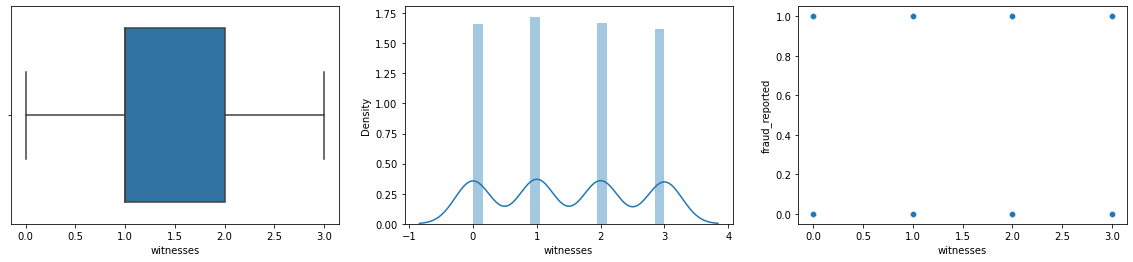

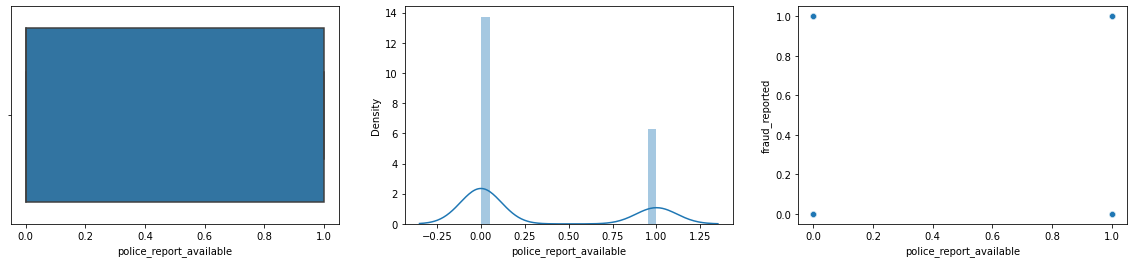

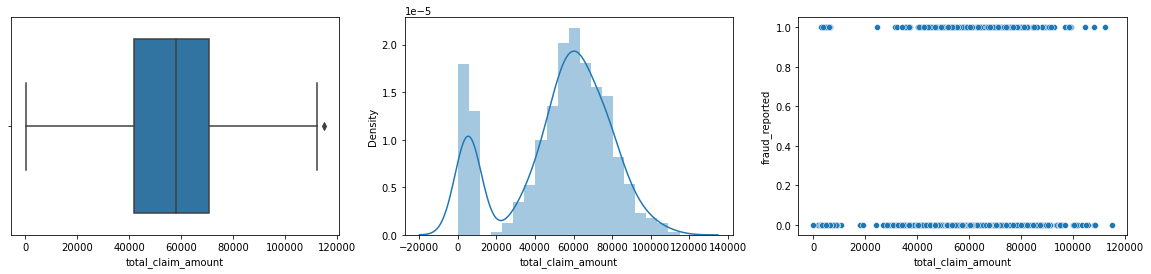

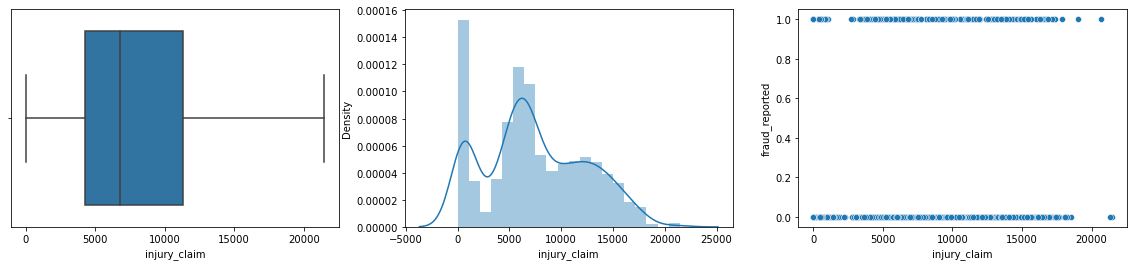

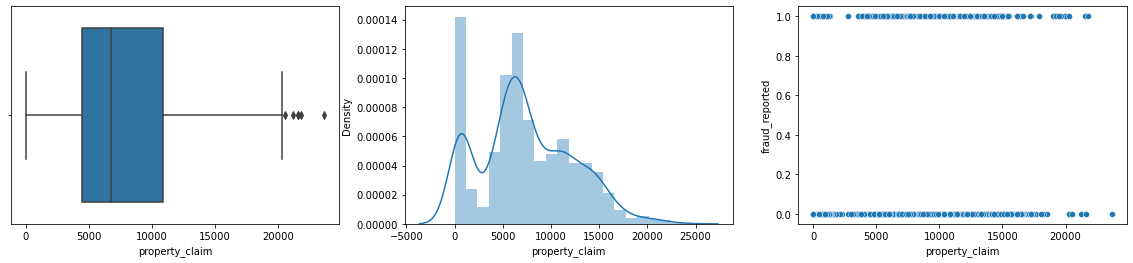

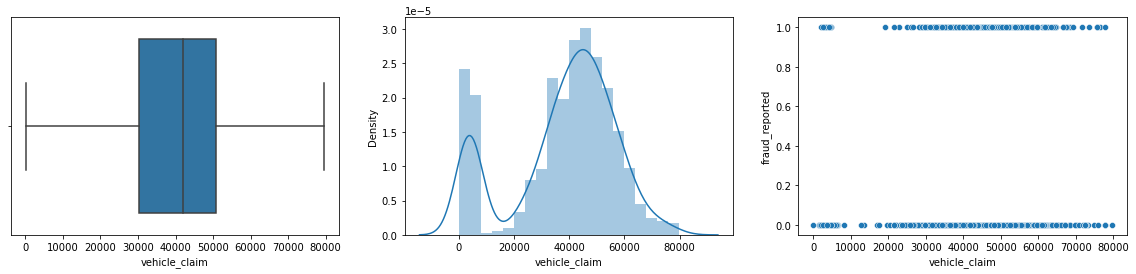

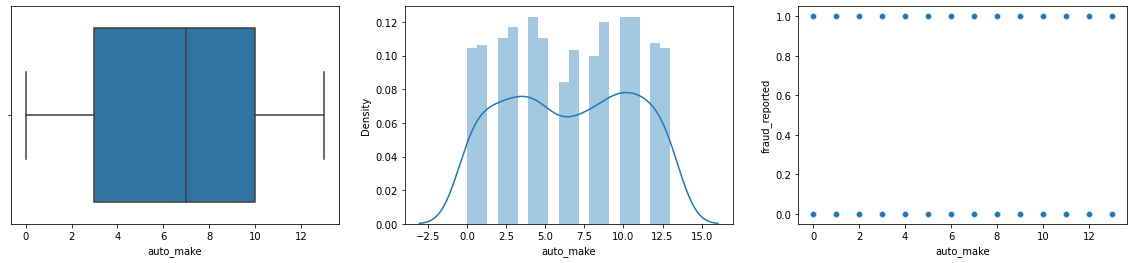

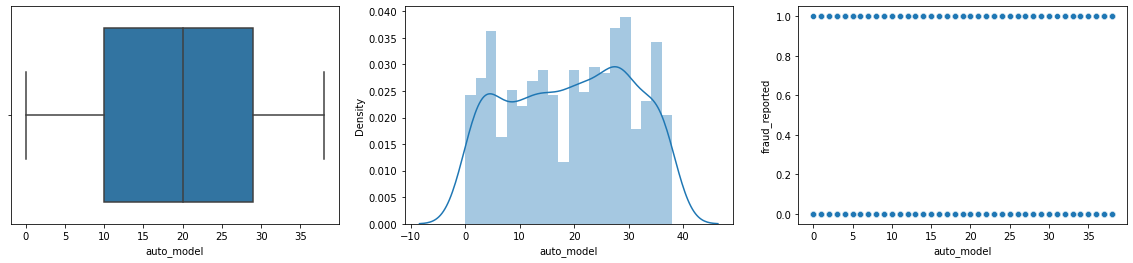

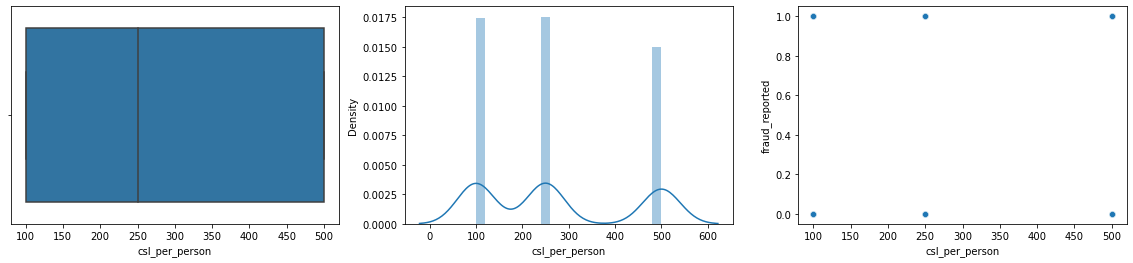

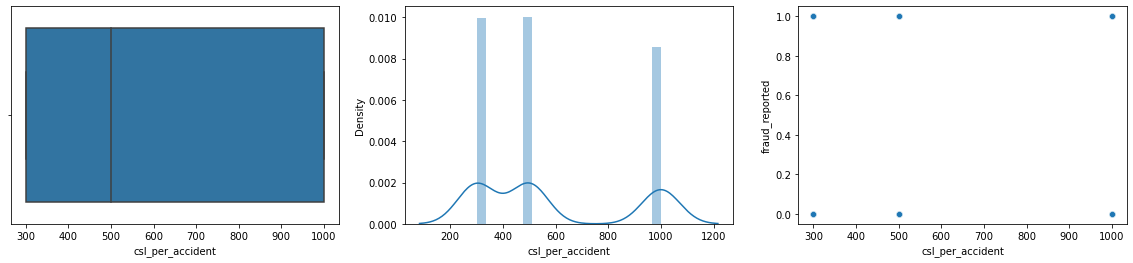

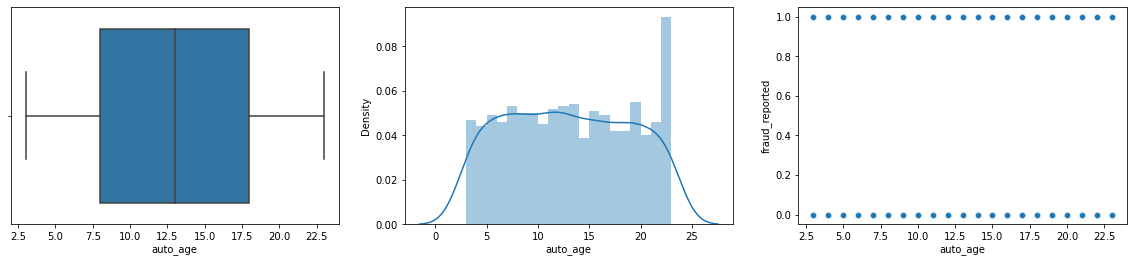

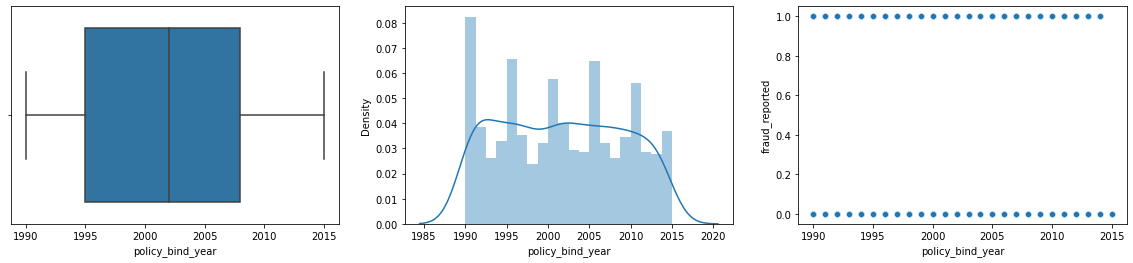

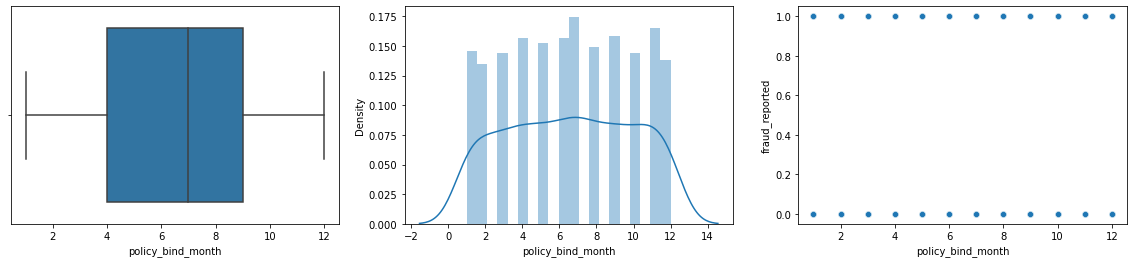

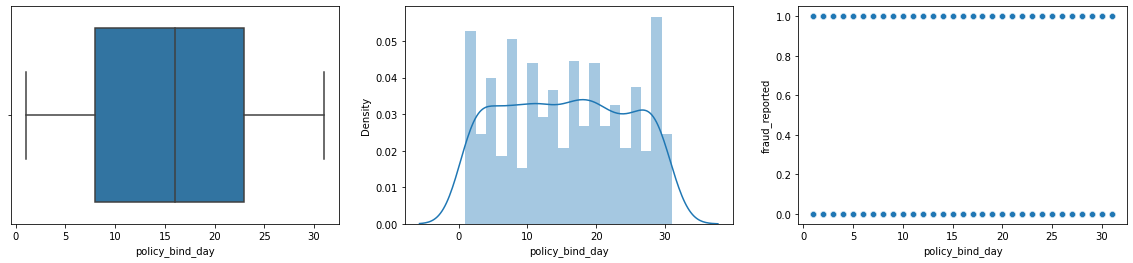

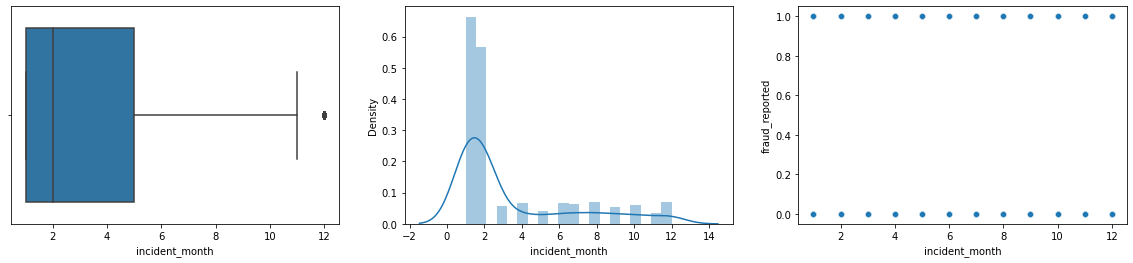

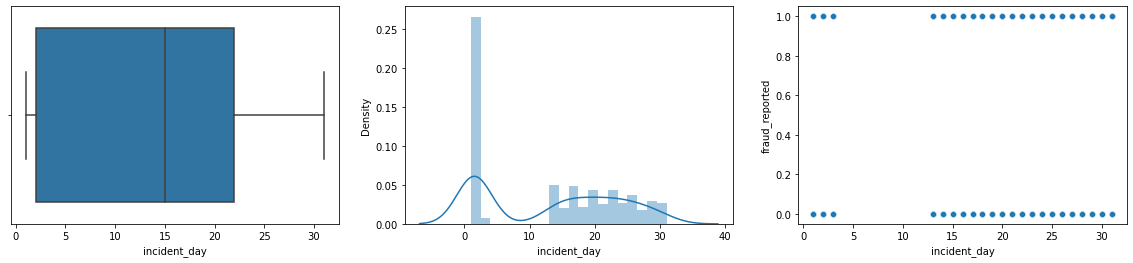

In [52]:
target_variable = 'fraud_reported'
feature_variable = ['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
        'csl_per_person', 'csl_per_accident', 'auto_age',
       'policy_bind_year', 'policy_bind_month', 'policy_bind_day',
       'incident_month', 'incident_day']

def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a1 = sns.boxplot(x=df[feature_name],ax=axs[0])
    a2 = sns.distplot(df[feature_name],bins=20,kde=True,ax=axs[1])
    a3 = sns.scatterplot(data=df,x=feature_name,y=target_variable,ax=axs[2])
    plt.show()
    
for i in feature_variable:
    num_plots(i)

The above graph shows the visualization the relationship between target and the feature variable.

# Scaling data

In [405]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x),columns = x.columns)

In [407]:
X

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_make,auto_model,csl_per_person,csl_per_accident,auto_age,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,1.051279,1.008733,1.146048,0.067784,0.616676,0.0,1.076953,0.568665,-1.154771,1.227979,...,0.859111,-1.808345,0.136943,0.048402,0.246990,1.671623,1.003506,0.254254,-1.100457,1.046044
1,0.304536,0.431433,0.071806,1.271863,-0.242577,0.0,1.076953,0.568665,-0.089755,0.920483,...,0.418616,-0.586225,0.136943,0.048402,-0.244155,0.602612,-0.109292,1.236653,-1.100457,0.824760
2,-0.511226,-1.139513,1.146048,1.271863,0.642206,0.0,-0.928546,1.462749,1.055047,-1.402398,...,-0.555149,0.944905,-1.219080,-1.176316,-0.244155,-0.210788,-0.109292,-0.656388,-0.025412,0.882430
3,0.523344,0.327852,-1.259374,1.271863,0.652860,0.0,-0.928546,1.462749,-1.464730,-1.402398,...,-0.828189,1.252785,0.136943,0.048402,-1.577854,-1.589331,-0.407354,1.049715,1.553521,-1.292836
4,0.304536,0.631918,-1.259374,0.067784,1.342030,0.0,1.076953,-1.631894,1.055047,-1.402398,...,-1.809810,1.022679,1.257973,1.311817,-0.592514,1.671623,-0.109292,-1.050168,-0.025412,0.574909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,0.002457,1.146048,0.067784,0.222833,0.0,-0.928546,1.025429,-1.154771,0.604550,...,-0.049272,-1.194088,1.257973,1.311817,-0.076686,-1.449971,0.179599,0.148165,-0.025412,0.882430
996,0.741446,0.327852,-1.259374,0.067784,0.739122,0.0,-0.928546,1.462749,0.613468,1.227979,...,1.481528,0.787622,-1.219080,-1.176316,-1.806448,1.671623,-0.407354,-1.856382,-1.100457,0.992966
997,-0.549706,-0.470444,1.146048,-1.211269,0.520703,0.0,-0.928546,1.025429,-1.464730,-1.185954,...,1.071136,0.045463,0.136943,0.048402,1.430076,0.197138,-1.380859,0.254254,-1.100457,0.938462
998,1.912654,2.130554,-1.259374,1.271863,0.411823,0.0,1.076953,-1.631894,-0.338647,-1.896338,...,-1.440763,-1.305341,1.257973,1.311817,1.147992,1.272801,1.266670,0.358635,-0.025412,1.097786


# Checking Multicolinearity

In [409]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,4.688572,months_as_customer
1,4.696374,age
2,1.039832,policy_state
3,1.039886,policy_deductable
4,1.044975,policy_annual_premium
5,NaN,insured_zip
6,1.036663,insured_sex
7,1.047243,insured_education_level
8,1.019061,insured_occupation
9,1.056558,insured_hobbies


In [410]:
X = X.drop(['total_claim_amount'],axis=1)

In [415]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,4.686503,months_as_customer
1,4.685925,age
2,1.039716,policy_state
3,1.039530,policy_deductable
4,1.035536,policy_annual_premium
5,NaN,insured_zip
6,1.035064,insured_sex
7,1.046967,insured_education_level
8,1.017527,insured_occupation
9,1.053680,insured_hobbies


In [416]:
X = X.drop(['csl_per_accident'],axis=1)

In [417]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,4.686038,months_as_customer
1,4.685495,age
2,1.038668,policy_state
3,1.039250,policy_deductable
4,1.035161,policy_annual_premium
5,NaN,insured_zip
6,1.028834,insured_sex
7,1.046952,insured_education_level
8,1.017516,insured_occupation
9,1.051919,insured_hobbies


Now we have removed all high vif values. And all values are less than 10 now.

# Balancing Target Variable using SMOTE

In [418]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [420]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X,y = sm.fit_resample(X,y)

In [421]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# Training the Dataset

In [424]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression

In [429]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=i,test_size=.22)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred_y = lr.predict(x_test)
    temp = accuracy_score(y_test,pred_y)
    
    if temp>acc:
        acc = temp
        best_rstate = i
print("Accuracy_Score :", acc*100, "Best Random State : ",best_rstate)
        
        

Accuracy_Score : 82.2289156626506 Best Random State :  525


In [430]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=525,test_size=.22)

In [435]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [440]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()

model = [lr,kn,dtc,svc,gnb,rfc,ada]

In [441]:
mean_squared_err = []
mean_absolute_err = []
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    
    
    print("Accuracy Score ",m," is ", accuracy_score(y_test,predm))
    print("Mean Squared Error is ", mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Accuracy Error is ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score is ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    
    print("Confusion Matrix is",confusion_matrix(y_test,predm))
    print("Classification report is ",classification_report(y_test,predm))
    print("\n\n")
    

Accuracy Score  LogisticRegression()  is  0.822289156626506
Mean Squared Error is  0.17771084337349397
Mean Accuracy Error is  0.17771084337349397
R2 Score is  0.28913082925058975
Confusion Matrix is [[135  32]
 [ 27 138]]
Classification report is                precision    recall  f1-score   support

           0       0.83      0.81      0.82       167
           1       0.81      0.84      0.82       165

    accuracy                           0.82       332
   macro avg       0.82      0.82      0.82       332
weighted avg       0.82      0.82      0.82       332




Accuracy Score  KNeighborsClassifier()  is  0.6897590361445783
Mean Squared Error is  0.3102409638554217
Mean Accuracy Error is  0.3102409638554217
R2 Score is  -0.24100889130829262
Confusion Matrix is [[ 66 101]
 [  2 163]]
Classification report is                precision    recall  f1-score   support

           0       0.97      0.40      0.56       167
           1       0.62      0.99      0.76       165

    ac

We have RabdomForestClassifier with 89% accuracy we can further conform by cross validation

# Cross Validation

In [444]:
mean = []
std = []

for m in model:
    CV = cross_val_score(m,X,y,cv=5)
    print("Score of ",m," is ",CV)
    print("Mean score of ",m," is ",CV.mean())
    mean.append(CV.mean())
    print("Standard Deviation is ", CV.std())
    std.append(CV.std())
    print('\n')

Score of  LogisticRegression()  is  [0.74834437 0.73421927 0.75747508 0.79069767 0.78405316]
Mean score of  LogisticRegression()  is  0.7629579107170359
Standard Deviation is  0.021373021957770452


Score of  KNeighborsClassifier()  is  [0.62913907 0.64451827 0.69767442 0.70431894 0.71096346]
Mean score of  KNeighborsClassifier()  is  0.6773228311808321
Standard Deviation is  0.033682286313994364


Score of  DecisionTreeClassifier()  is  [0.73178808 0.77076412 0.8538206  0.89036545 0.89036545]
Mean score of  DecisionTreeClassifier()  is  0.8274207388176278
Standard Deviation is  0.06477129542526221


Score of  SVC()  is  [0.78807947 0.81063123 0.90033223 0.87043189 0.93023256]
Mean score of  SVC()  is  0.8599414754350839
Standard Deviation is  0.053437713431474715


Score of  GaussianNB()  is  [0.70198675 0.69767442 0.75083056 0.76744186 0.77408638]
Mean score of  GaussianNB()  is  0.7384039955116498
Standard Deviation is  0.03242210215743326


Score of  RandomForestClassifier()  is  [

Here we have RandomForestClassifier with 87% accuracy

We can further Hypertune to increase accuracy

# Hypertuning

In [445]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [447]:
param_grid = [{'n_estimators':[20,50,100],
              'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2']}]

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [448]:
rf_random = GridSearchCV(rf,param_grid,cv=5)


In [449]:
rf_random.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [20, 50, 100]}])

In [450]:
rf_random.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 50}

In [452]:
rf_random.best_score_

0.8713838879796327

After hypertuning accuracy remained unchanged 87%

In [453]:
preds = cross_val_predict(rf_random.best_estimator_,x_train,y_train,cv=5,n_jobs=-1)

In [454]:
predy = rfc.predict(x_test)
predy

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

# AUC-ROC Curve

In [455]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [456]:
y_pred_proba = rfc.predict_proba(x_test)[:,-1]

In [457]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

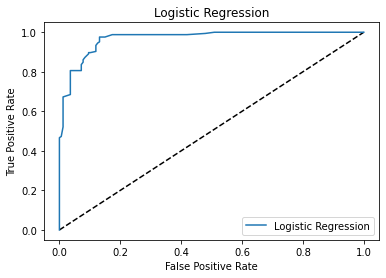

In [458]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AUC-ROC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [459]:
auc_score = roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

0.8916349119941934


auc score is 89%

# Saving the best model

In [460]:
import joblib
joblib.dump(predy,"Insurance_Claim_Fraud_Detection.obj")

['Insurance_Claim_Fraud_Detection.obj']